In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas_visual_analysis import VisualAnalysis, DataSource
from pandas_profiling import ProfileReport
import ipywidgets 
ipywidgets.__version__

C:\Users\kmmoh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


'7.6.5'

In [2]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\raw_survery.csv')
#df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\book2.csv')


In [3]:
df.shape

(141, 41)

In [4]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
#profile.to_widgets()
#VisualAnalysis(df)

<AxesSubplot:>

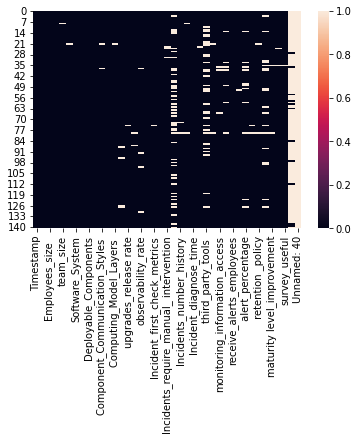

In [5]:
sns.heatmap(df.isnull())


In [6]:
#df.isnull().sum()
df.columns

Index(['Timestamp', 'Industry', 'Employees_size  ', ' IT_size', 'team_size',
       'LifeCycle_Software', 'Software_System', 'Software_system_architecture',
       'Deployable_Components', ' Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'problem_discover  ',
       'Incident_first_check_metrics', ' Most_common_incident ',
       'Incidents_require_manual_ intervention', 'managed_incidents',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'Deployment_techniques', 'third_party_tools ',
       'new_component_in production', 'monitoring_information_access',
       'alert_receiver', 'receive_alerts_employees', 'alert_rate',
       ' alert_percentage', 'maximum_granularity ', ' retention _policy',
       'reliability_availability', 'maturity level_improvement'

In [7]:
selected_columns1=['Timestamp', 'Industry', 'Employees_size  ', ' IT_size', 'team_size',
       'LifeCycle_Software', 'Software_System', 'Software_system_architecture',
       'Deployable_Components', ' Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'problem_discover  ']
X=df[selected_columns1]

In [8]:
#graph colimns'upgrades_release rate', 'System_load_ user_requests'
barcolumns=['Employees_size  ', ' IT_size', 'team_size','Deployable_Components','Deployed_on','Release_automation_rate']
piecolumns=['Industry','LifeCycle_Software', 'Software_System', 'Software_system_architecture',' Runtime_component_instances',
            'Component_Communication_Styles ','Computing_Model_Layers ', 'Release_automation_rate','upgrades_release rate', 'System_load_ user_requests',
            'observability_rate', 'problem_discover  ']

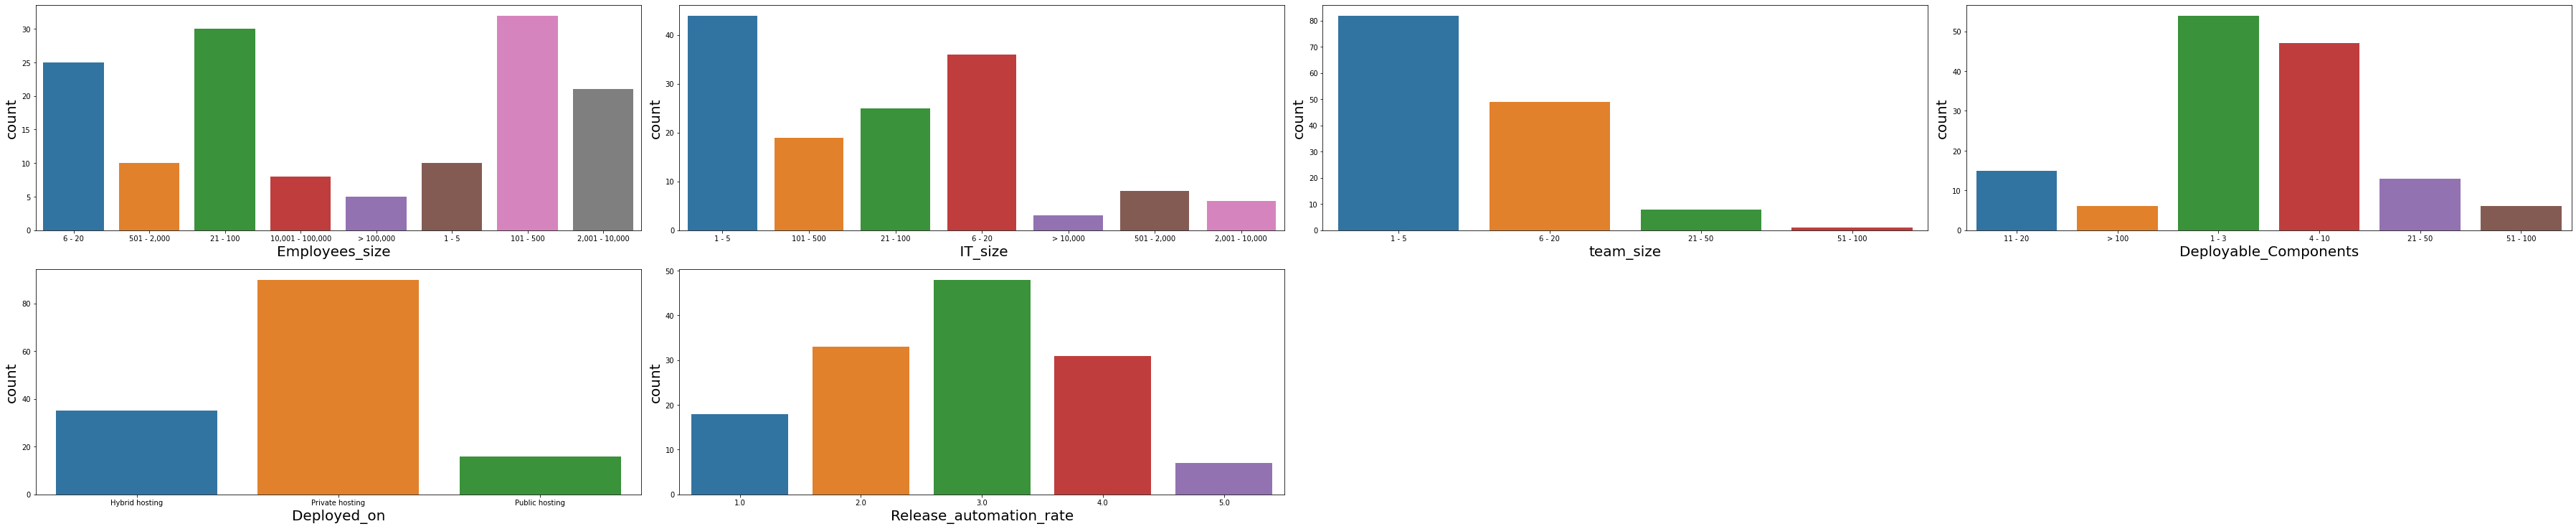

In [9]:
plotnumber=1
plt.figure(figsize=(50,20))
for column in df[barcolumns]:
  
        df[column].sort_values(ascending=True)
        if plotnumber<=16:
            ax = plt.subplot(4,4,plotnumber)
            sns.countplot(column,data=df)
            plt.xlabel(column,fontsize=20)
            plt.ylabel('count',fontsize=20)
    
        
        plotnumber+=1
plt.tight_layout()

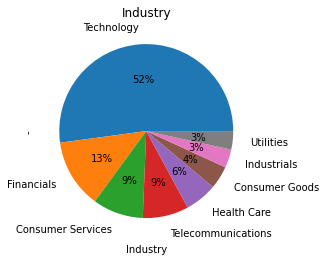

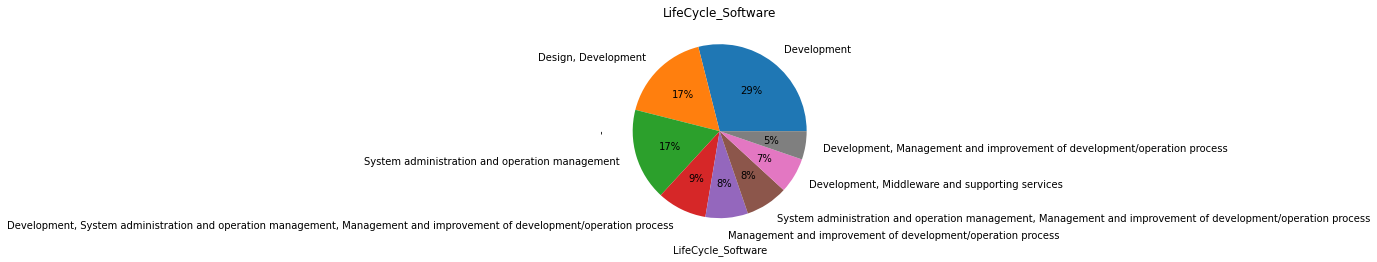

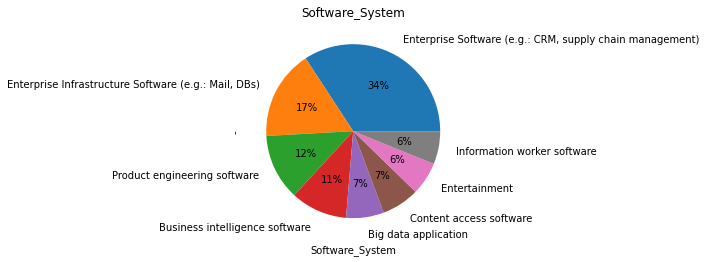

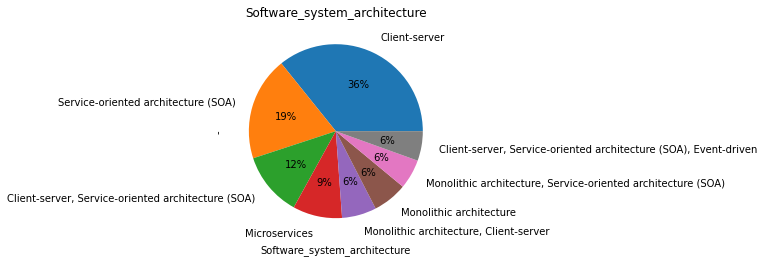

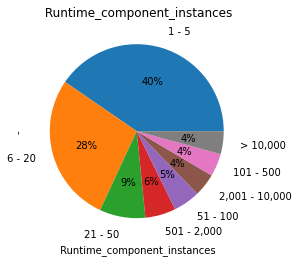

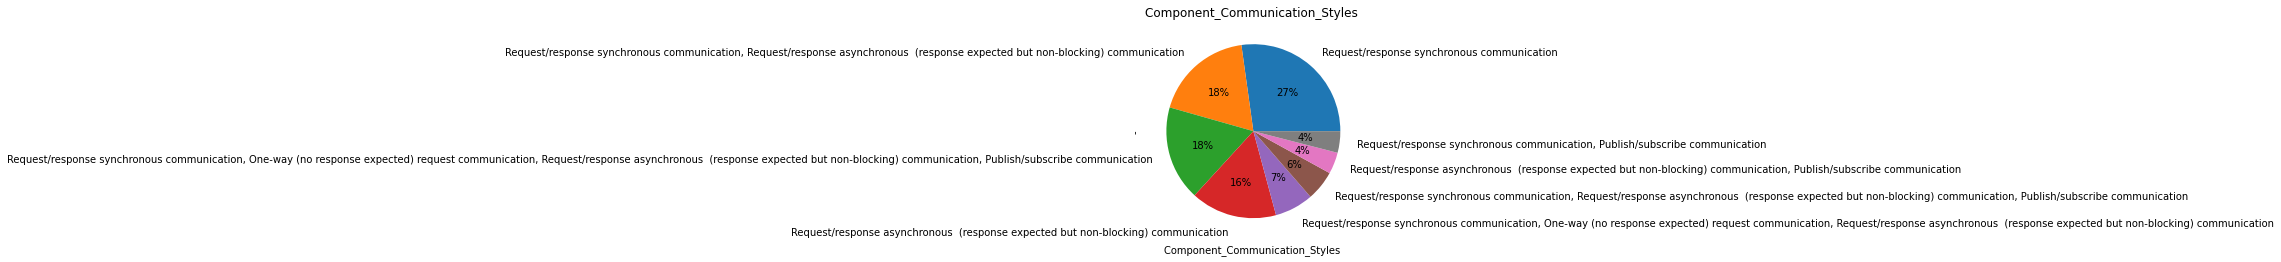

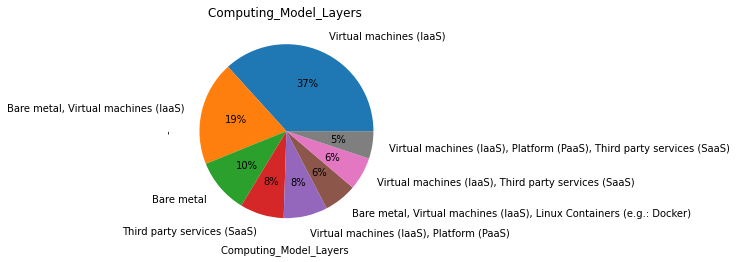

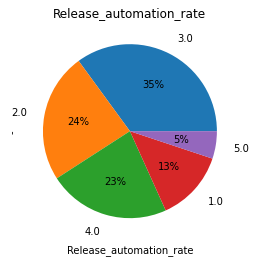

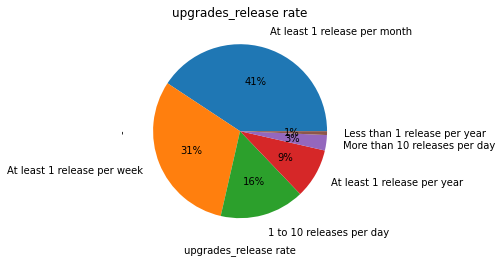

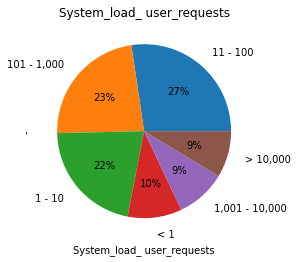

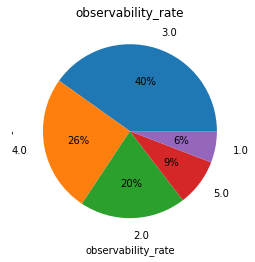

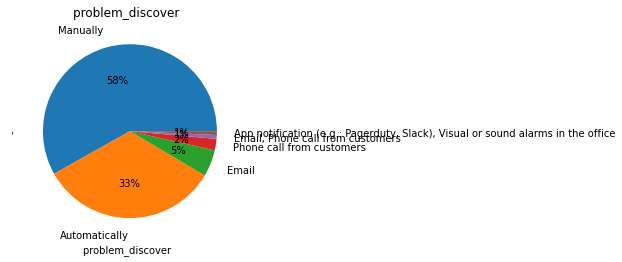

In [10]:
for column in df[piecolumns]:
       
        labels=df[column].value_counts().index
        df[column].value_counts().head(8).plot.pie(labels=labels,autopct='%1.0f%%',labeldistance=1.2)
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()

In [11]:
df['Software_system_architecture'].value_counts()

Client-server                                                                                    39
Service-oriented architecture (SOA)                                                              21
Client-server, Service-oriented architecture (SOA)                                               13
Microservices                                                                                    10
Monolithic architecture, Client-server                                                            7
Monolithic architecture                                                                           7
Monolithic architecture, Service-oriented architecture (SOA)                                      6
Client-server, Service-oriented architecture (SOA), Event-driven                                  6
Client-server, Service-oriented architecture (SOA), Microservices, Event-driven                   4
Client-server, Service-oriented architecture (SOA), Microservices                                 4


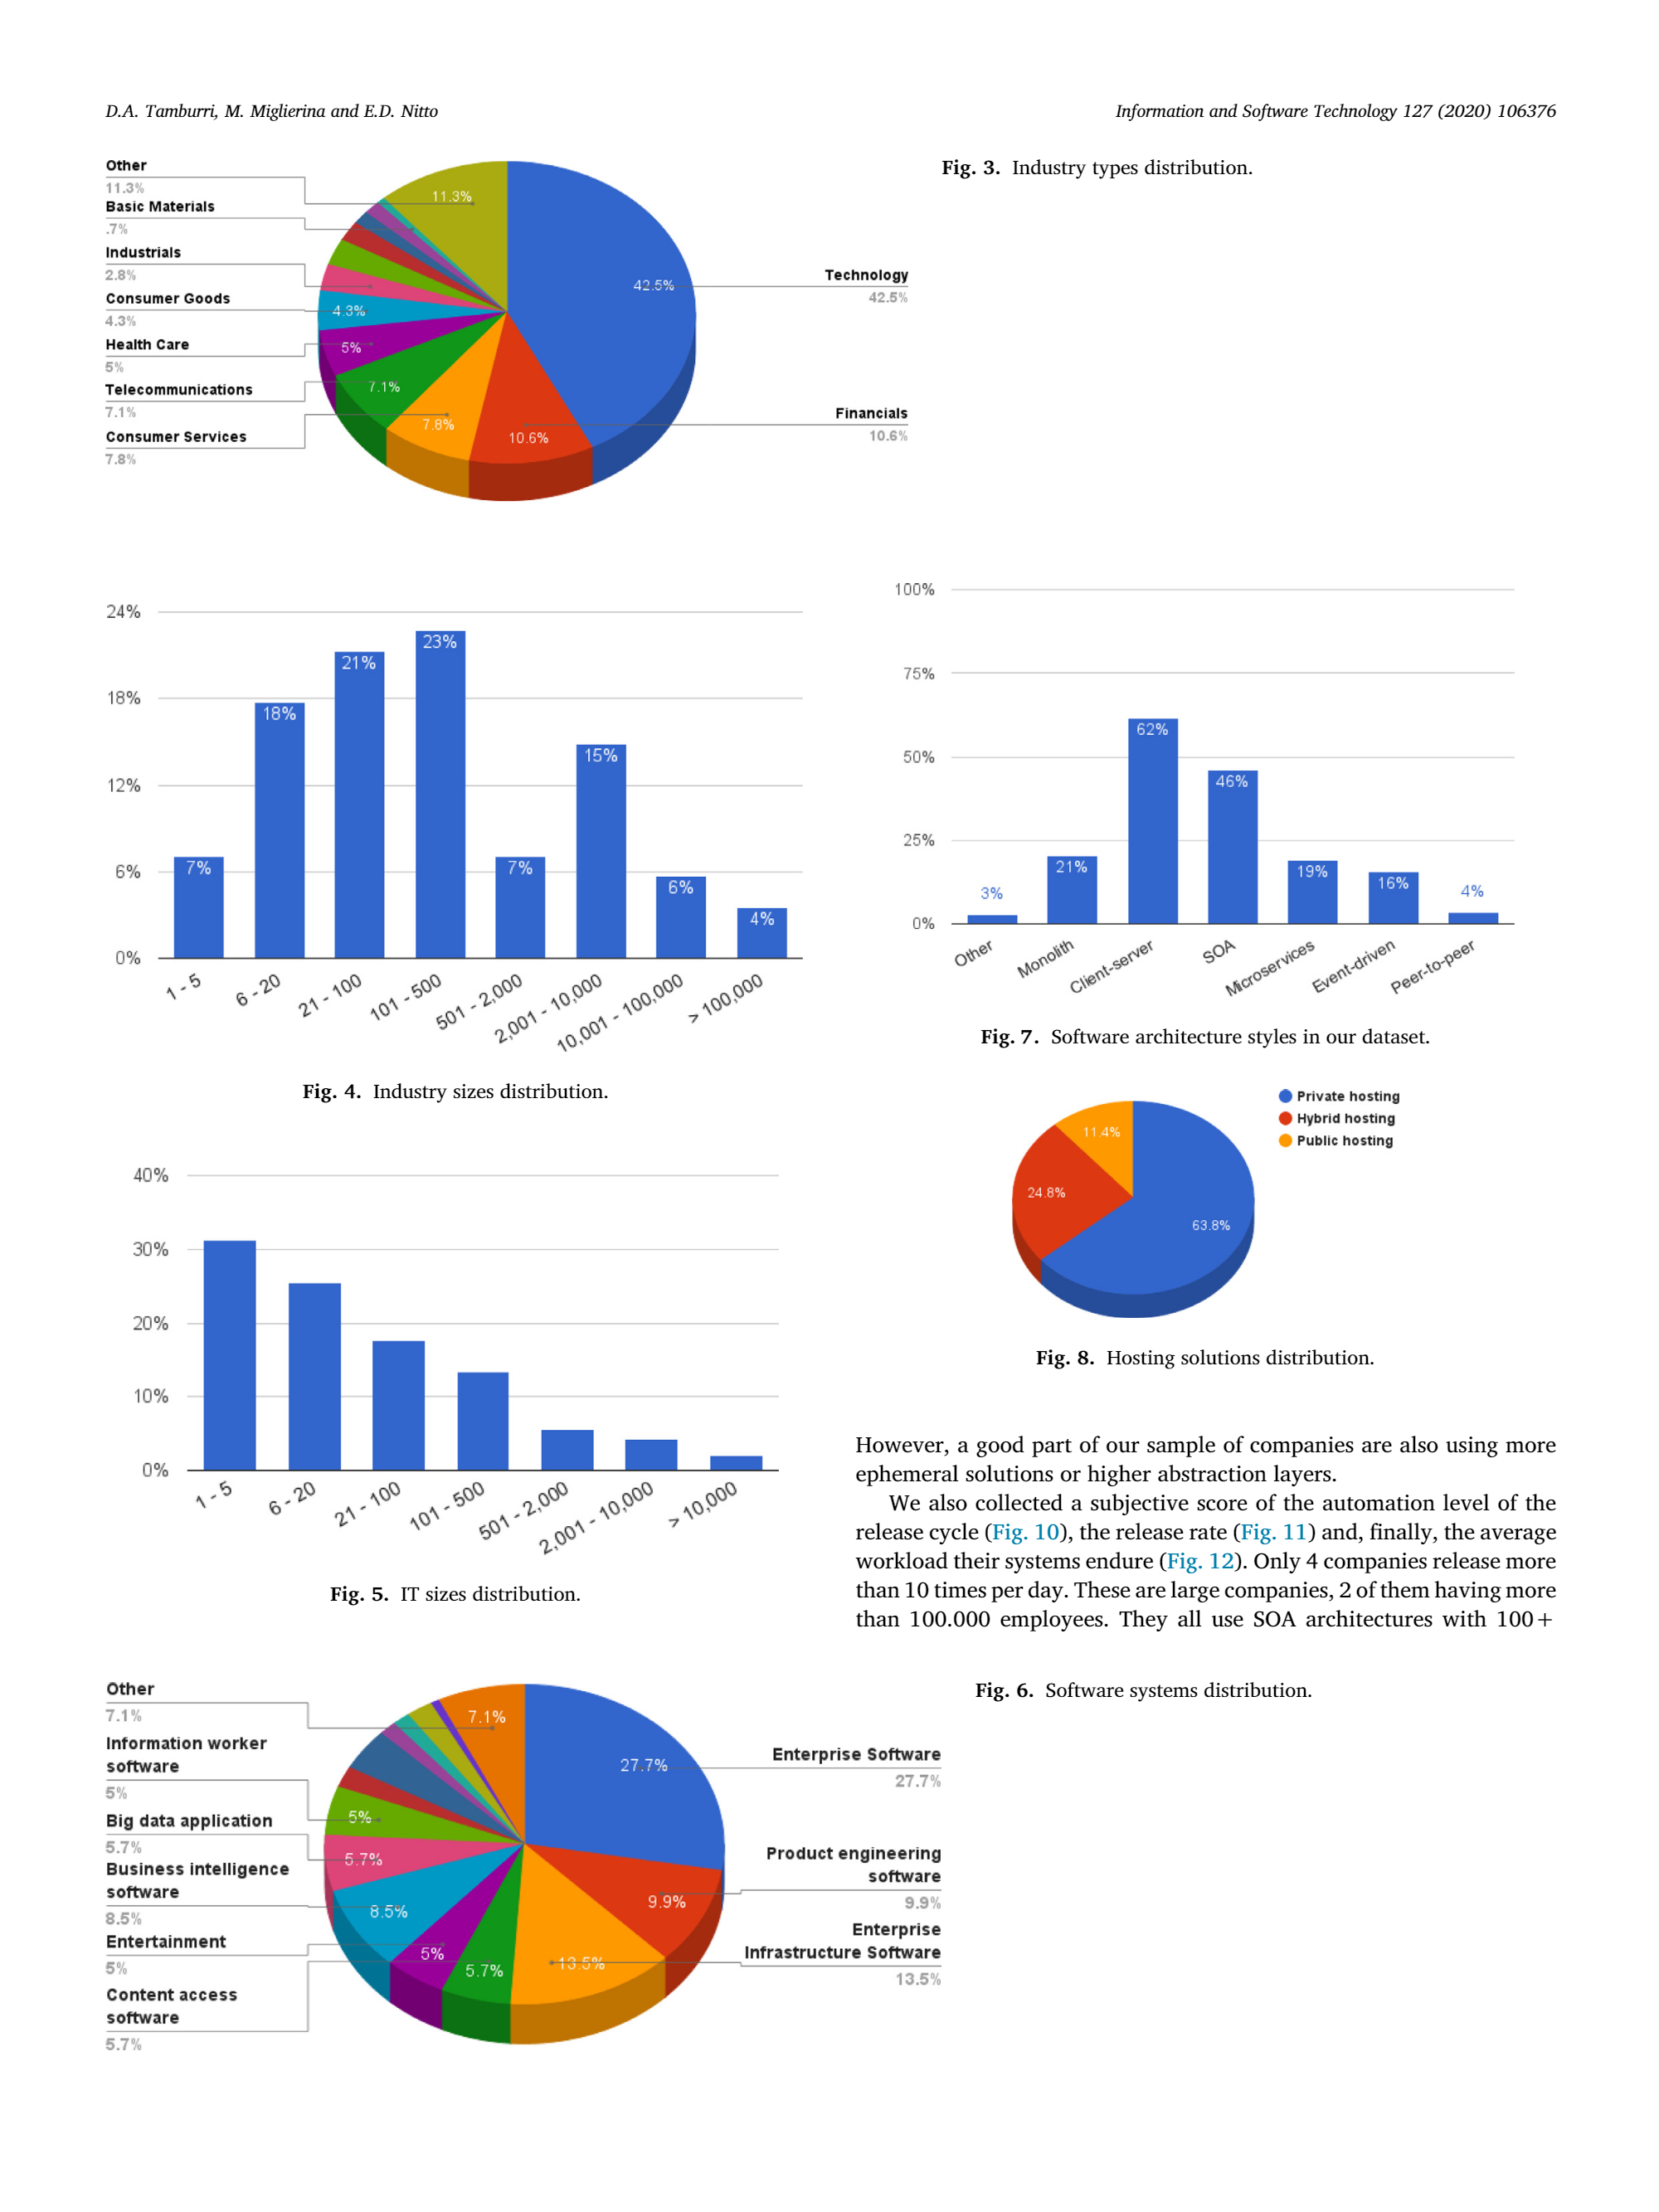